In [1]:
import pandas as pd

In [2]:
macd = pd.read_excel('/content/Mc_Donalds.xlsx')

In [4]:
macd.head()

,Country,Big Mac Price,New Hourly Wage
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


In [5]:
macd.describe()

,Big Mac Price,New Hourly Wage
count,27.000000,27.000000
mean,2.238889,6.058889
std,0.844627,4.903372
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.500000


In [6]:
macd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          27 non-null     object 
 1   Big Mac Price    27 non-null     float64
 2   New Hourly Wage  27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


In [7]:
macd.duplicated().sum()

np.int64(0)

In [8]:
macd.isnull().sum()

,0
Country,0
Big Mac Price,0
New Hourly Wage,0


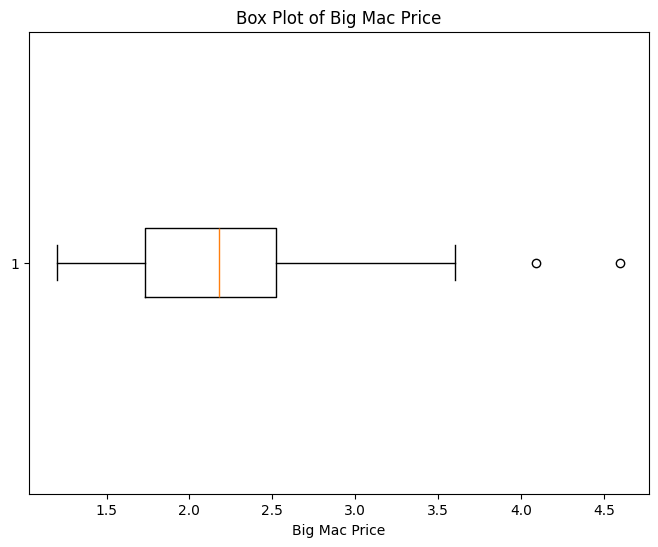

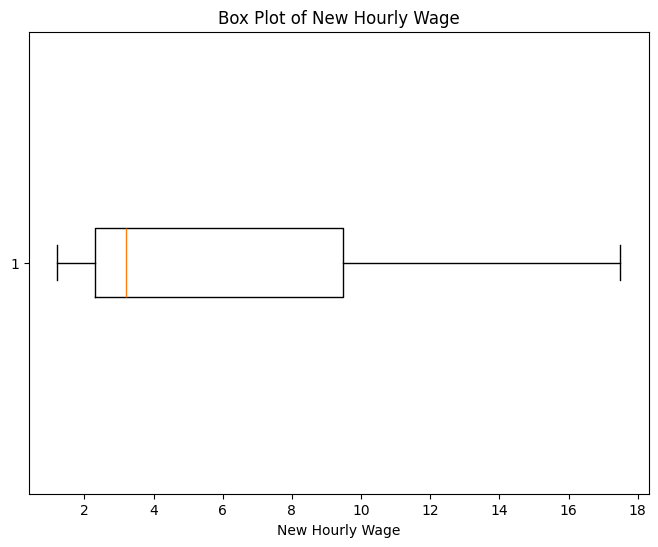

In [9]:
# plotting box plots of each numeric column of macd

import matplotlib.pyplot as plt

numeric_cols = macd.select_dtypes(include=['number']).columns

for col in numeric_cols:
  plt.figure(figsize=(8, 6))  # Adjust figure size if needed
  plt.boxplot(macd[col].dropna(), vert=False)  # Drop NaN values for boxplot
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()


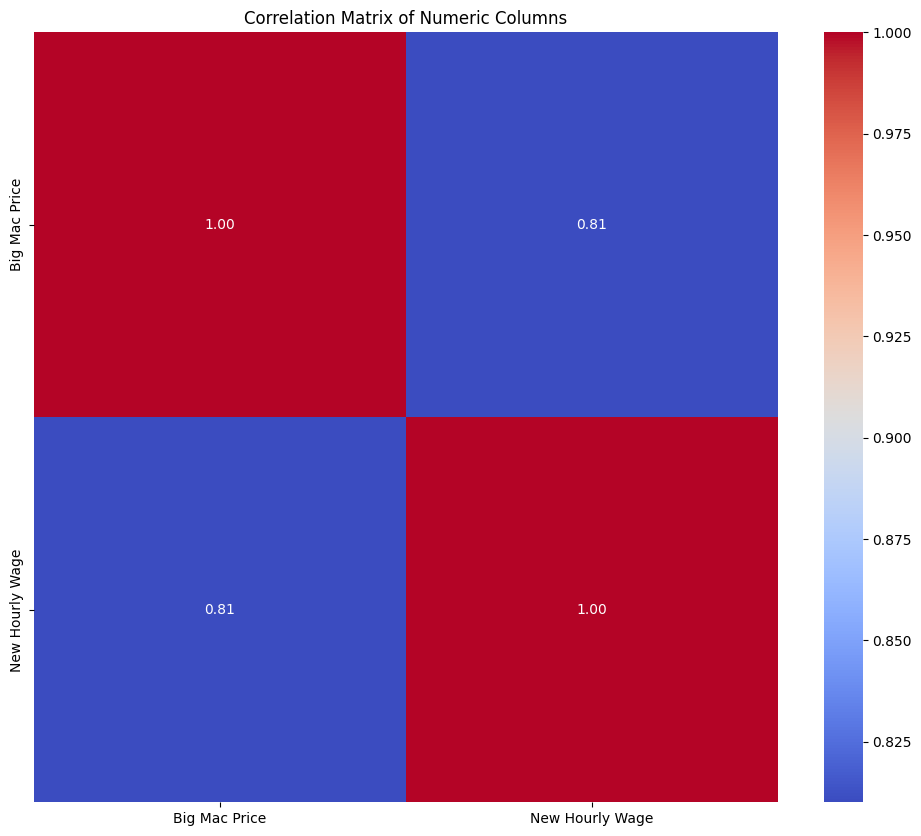

In [ ]:
# checking for correlation between all numeric columns of df macd

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = macd.select_dtypes(include=['number']).columns

correlation_matrix = macd[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


In [10]:
x = macd['Big Mac Price']
y = macd['New Hourly Wage']

In [11]:
x.head()

,Big Mac Price
0,1.42
1,1.86
2,1.48
3,3.14
4,2.21


In [12]:
y.head()

,New Hourly Wage
0,1.70
1,7.80
2,2.05
3,12.30
4,9.35


In [13]:
# linear regression on x and y

import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        New Hourly Wage   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     47.73
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           3.05e-07
Time:                        18:53:18   Log-Likelihood:                -66.314
No. Observations:                  27   AIC:                             136.6
Df Residuals:                      25   BIC:                             139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4704      1.625     -2.751

In [14]:
# Predict when x = 3.0
x_new = pd.DataFrame({'const': [1], 'Big Mac Price': [3.0]})  # Create a DataFrame for prediction
prediction = model.predict(x_new)
print(f"Predicted 'New Hourly Wage' when 'Big Mac Price' is 3.0: {prediction[0]}")


Predicted 'New Hourly Wage' when 'Big Mac Price' is 3.0: 9.638327498706078


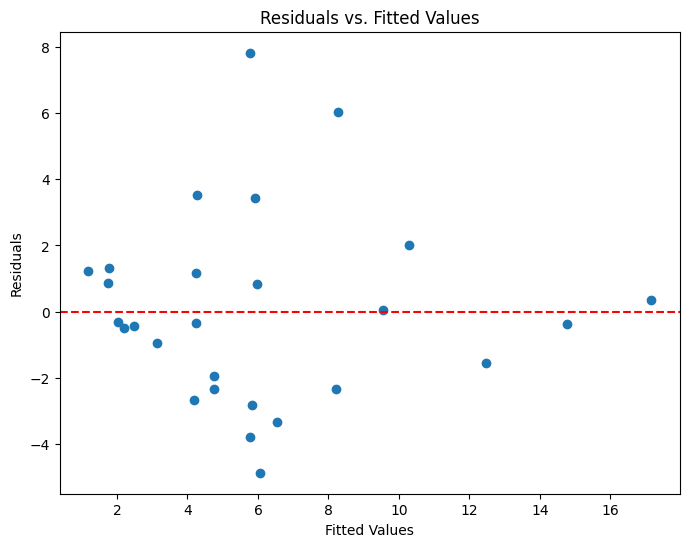

Breusch-Pagan Test:
LM statistic: 0.01701217242868147
p-value: 0.896225664019507


In [15]:
# checking for homoscadasticity and plot for homoscadasticity

import statsmodels.stats.api as sms

residuals = model.resid
fitted_values = model.fittedvalues

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.show()


# Perform Breusch-Pagan test for heteroscedasticity
bp_test = sms.het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan Test:")
print(f"LM statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")

# Interpretation of Breusch-Pagan test:
# If the p-value is less than a significance level (e.g., 0.05), then there is evidence of heteroscedasticity.
# If the p-value is greater than the significance level, we fail to reject the null hypothesis of homoscedasticity.


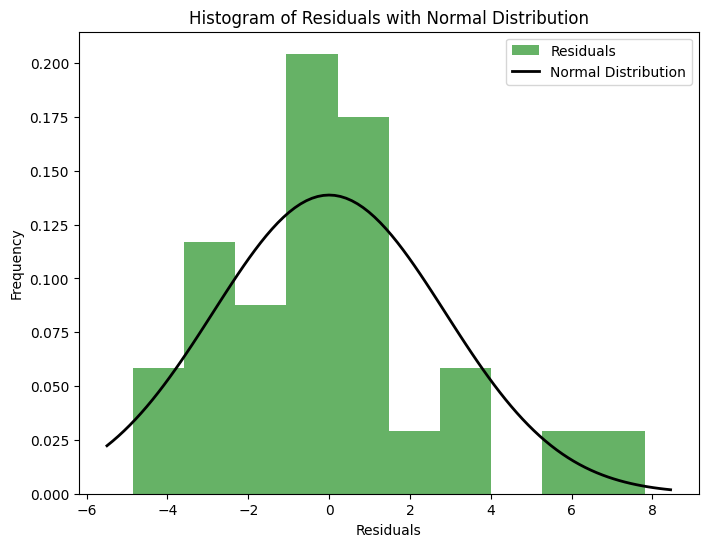

In [16]:
# plotting residuals normally distributed in a histogram with line

import matplotlib.pyplot as plt
import numpy as np

# Plot the residuals in a histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, density=True, alpha=0.6, color='g', label='Residuals')  # Adjust bins as needed

# Add a normal distribution curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = 1/(residuals.std() * np.sqrt(2 * np.pi)) * np.exp( - (x - residuals.mean())**2 / (2 * residuals.std()**2))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')


plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals with Normal Distribution")
plt.legend()
plt.show()
